In [32]:
from EOF_manage import *
from basic_op_jup import *
from I_O_manage import *
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cdo import Cdo
import pandas as pd

cdo=Cdo()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [33]:
dataset, dataset_names = input_interface('I_O.json')

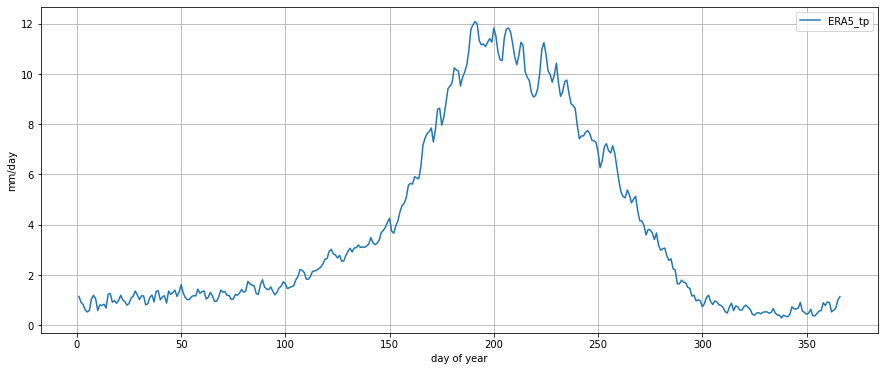

In [ ]:
day_serie = dataset.groupby('time.dayofyear').mean().mean(['lat','lon'])

plt.figure(figsize = (15,6))

for i in range(len(dataset_names)):
    getattr(day_serie,dataset_names[i]).plot(label = dataset_names[i])
    plt.xlabel('day of year')
    plt.ylabel('mm/day')
    plt.grid()
    plt.legend()

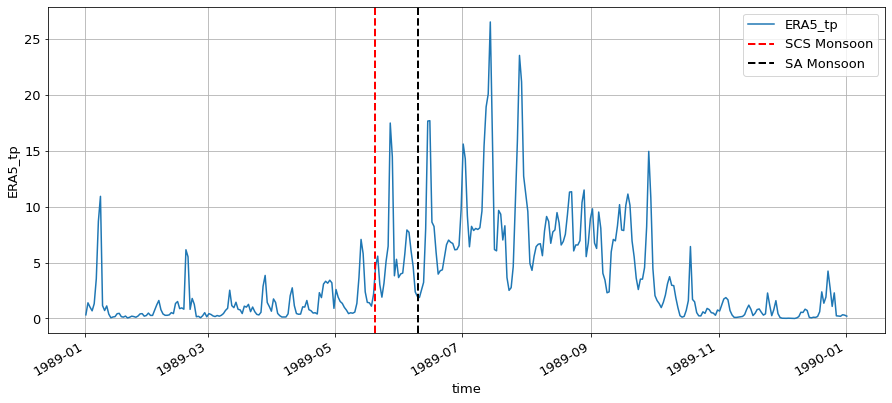

In [ ]:
time_serie = dataset.mean(['lat','lon'])

plt.figure(figsize = (15,6))

for i in range(len(dataset_names)):
    getattr(time_serie,dataset_names[i]).sel(time=slice("1989-01-01", "1990-01-01")).plot(label = dataset_names[i])
    plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    plt.grid()
    plt.legend()
    


In [ ]:
# Computing eofs and pcs for daily dataset
eof_database, pc_database, exp_databas, solver_list = eof_base_interface(dataset, dataset_names, 'EOF.json') 

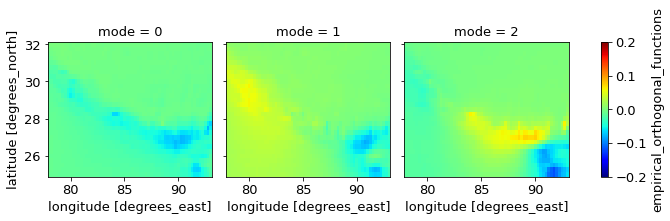

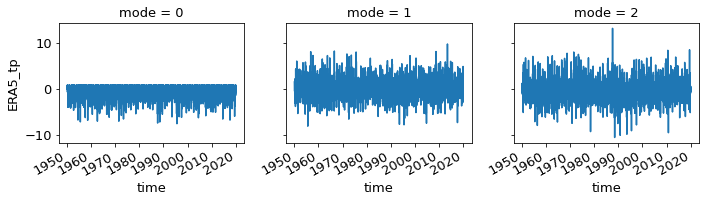

In [ ]:
eof_database.ERA5_tp.plot(col="mode", col_wrap = 3, vmin = -0.2, vmax = 0.2, cmap = 'jet')
pc_database.ERA5_tp.plot(col="mode", col_wrap = 3)

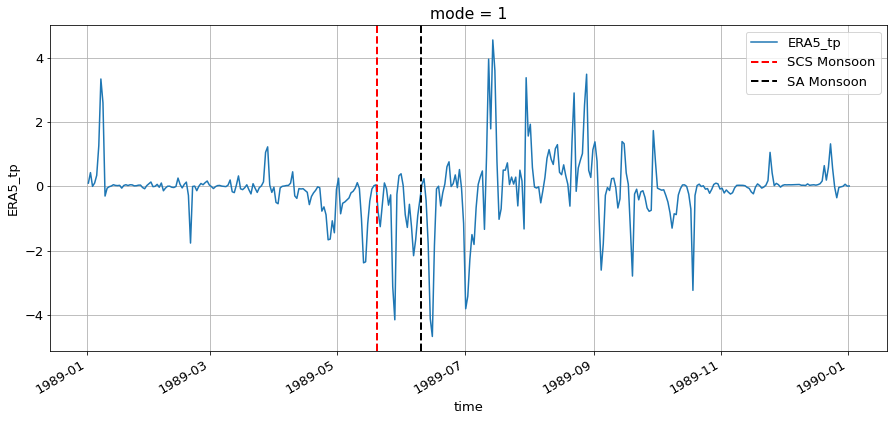

In [ ]:
plt.figure(figsize = (15,6))

for i in range(len(dataset_names)):
    getattr(pc_database,dataset_names[i]).sel(time=slice("1989-01-01", "1990-01-01")).sel(mode = 1).plot(label = dataset_names[i])
    plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    plt.grid()
    plt.legend()